## Twitter US Airline Sentiment
![alt text](17133827328287.jpg "Avião")

##### Esse dataset utiliza os dados retirados do [__[Kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)__ ](#division_ID).

- Esse problema visa resolver um Natural Language Processing. Analisando o sentimento de Twitter's e fazendo uma predição de futuras mensagens, elas são negativas ou positivas?

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.model_selection import StratifiedKFold
from matplotlib.font_manager import FontProperties
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline


In [2]:
font = FontProperties()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

In [3]:
dataset= pd.read_csv("Tweets.csv")

In [4]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
dataset.drop(['tweet_id', 'negativereason','negativereason_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location','user_timezone'], axis=1, inplace=True)

- Retirando colunas que não serão úteis para a analise dos dados.

In [6]:
dataset.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [7]:
for text in range (10):
    print(text,dataset['text'][text])

0 @VirginAmerica What @dhepburn said.
1 @VirginAmerica plus you've added commercials to the experience... tacky.
2 @VirginAmerica I didn't today... Must mean I need to take another trip!
3 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4 @VirginAmerica and it's a really big bad thing about it
5 @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
6 @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
7 @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
8 @virginamerica Well, I didn't…but NOW I DO! :-D
9 @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.


- Uma vista de como estão as mensagens.

In [8]:
dataset['tamanho']=dataset['text'].apply(len)

- Daqui tiramos o tamanho das mensagens, futuramente veremos que isso é um bom meio de prever se a mensagem é boa ou não.

In [9]:
dataset.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,tamanho
0,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35
1,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72
2,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71
3,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126
4,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55


In [10]:
Twitter=['JetBlue','DeltaAssist','SouthwestAir','United','USAirways',
      'AmericanAir']


- Quando olhamos o começo do Twitter ou qualquer parte do corpo da mensagem, vemos que a empresa tem que ser marcada, no caso, temos 6 empresas diferentes, basta criar uma lista contendo os nomes das empresas (no Twitter, no caso, o username).

In [11]:
Twitter

['JetBlue',
 'DeltaAssist',
 'SouthwestAir',
 'United',
 'USAirways',
 'AmericanAir']

In [12]:
dataset.groupby('airline_sentiment').describe()

airline_sentiment_confidence                              \
                                         count      mean       std     min   
airline_sentiment                                                            
negative                                9178.0  0.933365  0.138109  0.3394   
neutral                                 3099.0  0.823303  0.185594  0.3350   
positive                                2363.0  0.872039  0.179478  0.3356   

                                            retweet_count            ...       \
                       25%    50%  75%  max         count      mean  ...  75%   
airline_sentiment                                                    ...        
negative           1.00000  1.000  1.0  1.0        9178.0  0.093375  ...  0.0   
neutral            0.66605  0.916  1.0  1.0        3099.0  0.060987  ...  0.0   
positive           0.67750  1.000  1.0  1.0        2363.0  0.069403  ...  0.0   

                        tamanho                                            \
                    max   count        mean        std   min   25%    50%   
airline_sentiment                                                           
negative           44.0  9178.0  113.947919  30.719006  12.0  96.0  126.0   
neutral            28.0  3099.0   87.359471  37.682903  12.0  57.0   87.0   
positive           22.0  2363.0   86.082945  39.482103  12.0  52.0   86.0   

                                 
                     75%    max  
airline_sentiment                
negative           138.0  176.0  
neutral            123.0  167.0  
positive           124.0  186.0  

[3 rows x 24 columns]

- Podemos ver como estão distribuidos os dados.

In [13]:
negativo=len(dataset[dataset['airline_sentiment']=='negative'])
neutro=len(dataset[dataset['airline_sentiment']=='neutral'])
positivo=len(dataset[dataset['airline_sentiment']=='positive'])


- Com os cálculos feitos, podemos ter a quantidade de avaliações negativas, positivas e neutras.

In [14]:
print("O dataset contém {} avaliações negativas.".format(negativo))
print("O dataset contém {} avaliações neutras.".format(neutro))
print("O dataset contém {} avaliações positivo.".format(positivo))
print("\n")
print("Em suma, {:0.2f}% das avaliações são negativas.".format(negativo/(negativo+neutro+positivo)*100))

O dataset contém 9178 avaliações negativas.
O dataset contém 3099 avaliações neutras.
O dataset contém 2363 avaliações positivo.


Em suma, 62.69% das avaliações são negativas.


In [15]:
dataset

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,tamanho
0,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35
1,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72
2,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71
3,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126
4,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55
...,...,...,...,...,...,...,...,...
14635,positive,0.3487,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,63
14636,negative,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,150
14637,neutral,1.0000,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,60
14638,negative,1.0000,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,135


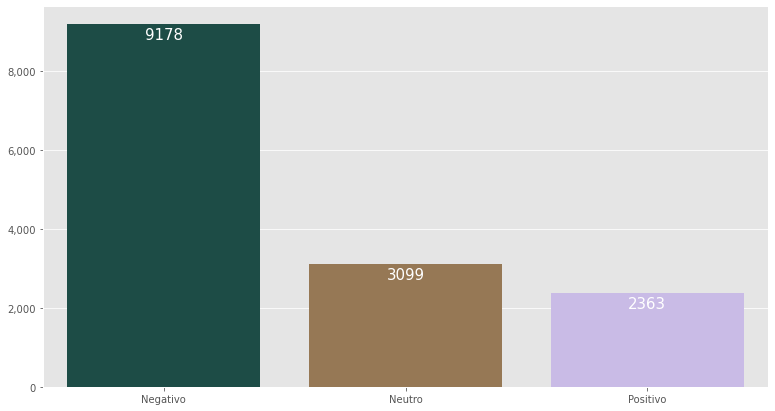

In [16]:
plt.figure(figsize=(13,7))
ax=sns.barplot(x=['Negativo','Neutro','Positivo'],y=[negativo,neutro,positivo],palette='cubehelix')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()-360),ha='center',fontsize=15,color='white')


In [17]:
dataset['Data']=pd.to_datetime(dataset['tweet_created']).apply(lambda x: x.strftime('%d/%m/%y'))
dataset['Hora']=pd.to_datetime(dataset['tweet_created']).apply(lambda x: x.strftime('%H:00'))
dataset['Hora1']=pd.to_datetime(dataset['Hora']).apply(lambda x: x.strftime('%H'))

- Criação de funções básicas para visualizações com relação a hora e data.

In [18]:
del dataset['tweet_created']

In [19]:
dataset

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tamanho,Data,Hora,Hora1
0,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,35,24/02/15,11:00,11
1,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,72,24/02/15,11:00,11
2,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,71,24/02/15,11:00,11
3,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,126,24/02/15,11:00,11
4,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,55,24/02/15,11:00,11
...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,63,22/02/15,12:00,12
14636,negative,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,150,22/02/15,11:00,11
14637,neutral,1.0000,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,60,22/02/15,11:00,11
14638,negative,1.0000,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",135,22/02/15,11:00,11


In [20]:
dataset['Hora1']=pd.to_numeric(dataset['Hora1'])

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   airline                       14640 non-null  object 
 3   name                          14640 non-null  object 
 4   retweet_count                 14640 non-null  int64  
 5   text                          14640 non-null  object 
 6   tamanho                       14640 non-null  int64  
 7   Data                          14640 non-null  object 
 8   Hora                          14640 non-null  object 
 9   Hora1                         14640 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.1+ MB


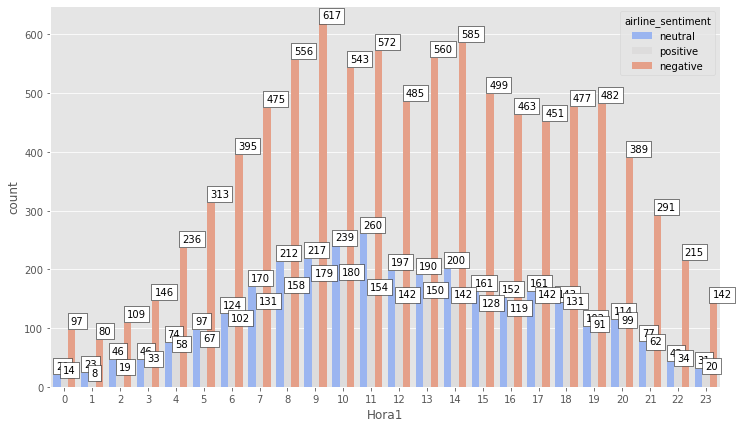

In [22]:
plt.figure(figsize=(12,7))


ax=sns.countplot(x='Hora1',data=dataset,hue='airline_sentiment',palette="coolwarm")
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+10),fontsize=10,bbox=dict(boxstyle="square", fc="w",color='black'))

In [23]:
(dataset[dataset['airline_sentiment']=='negative']).describe()

,airline_sentiment_confidence,retweet_count,tamanho,Hora1
count,9178.000000,9178.000000,9178.000000,9178.000000
mean,0.933365,0.093375,113.947919,12.436696
std,0.138109,0.792865,30.719006,5.447859
min,0.339400,0.000000,12.000000,0.000000
25%,1.000000,0.000000,96.000000,8.000000
50%,1.000000,0.000000,126.000000,12.000000
75%,1.000000,0.000000,138.000000,17.000000
max,1.000000,44.000000,176.000000,23.000000


Text(0.5, 0, 'Sentimento')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


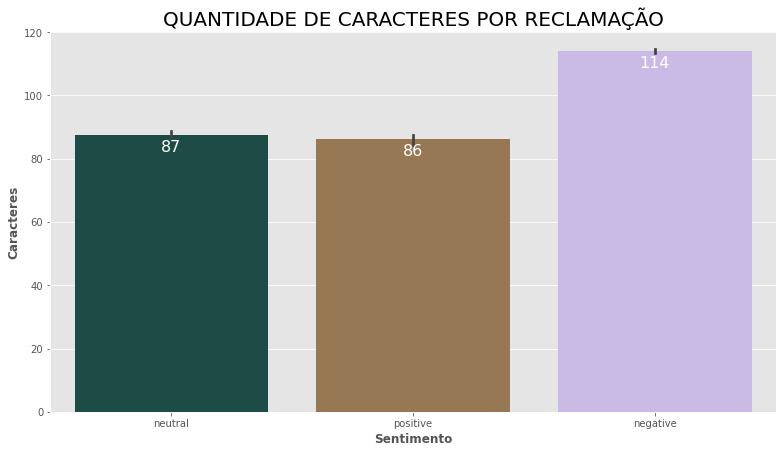

In [24]:
plt.figure(figsize=(13,7))
ax=sns.barplot(y='tamanho',x='airline_sentiment',data=dataset,palette='cubehelix')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()-5),ha='center',fontsize=16,color='white')
    
plt.title('QUANTIDADE DE CARACTERES POR RECLAMAÇÃO',size=20)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax.set_ylabel('Caracteres',fontproperties=font)
ax.set_xlabel('Sentimento',fontproperties=font)


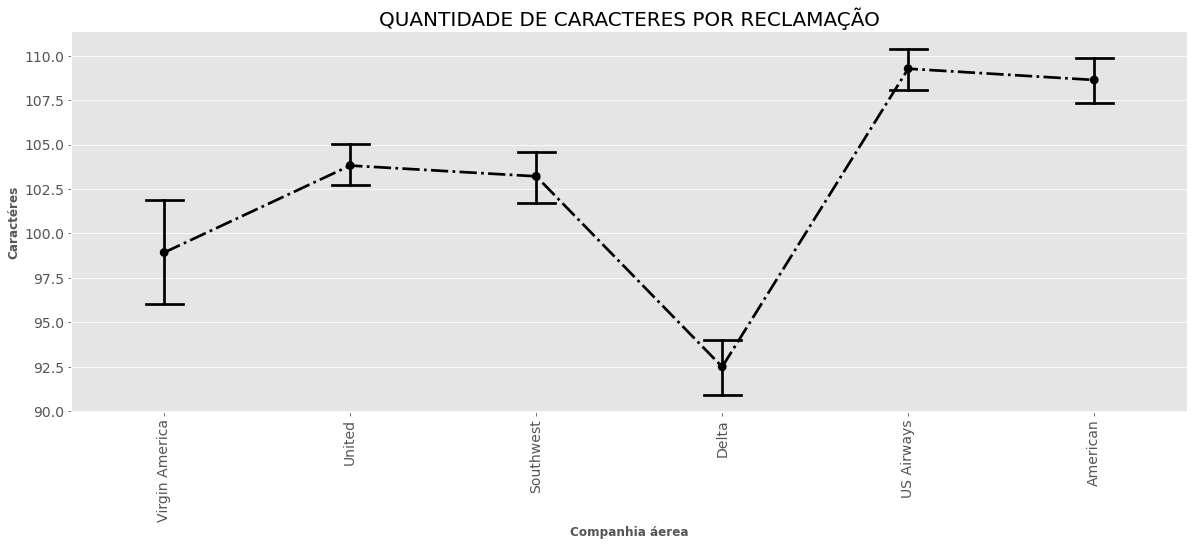

In [25]:
from numpy import median
plt.figure(figsize=(20,7))
ax = sns.pointplot(y="tamanho", x='airline',data=dataset,color='black',capsize=.2,linestyles=["-."])
plt.xticks(rotation=90)
plt.title('QUANTIDADE DE CARACTERES POR RECLAMAÇÃO',size=20)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax.set_ylabel('Caractéres',fontproperties=font)
ax.set_xlabel('Companhia áerea',fontproperties=font)
plt.show()

In [26]:
dataset['Data'].unique()

array(['24/02/15', '23/02/15', '22/02/15', '21/02/15', '20/02/15',
       '19/02/15', '18/02/15', '17/02/15', '16/02/15'], dtype=object)

In [27]:
negativo=pd.to_numeric(negativo)

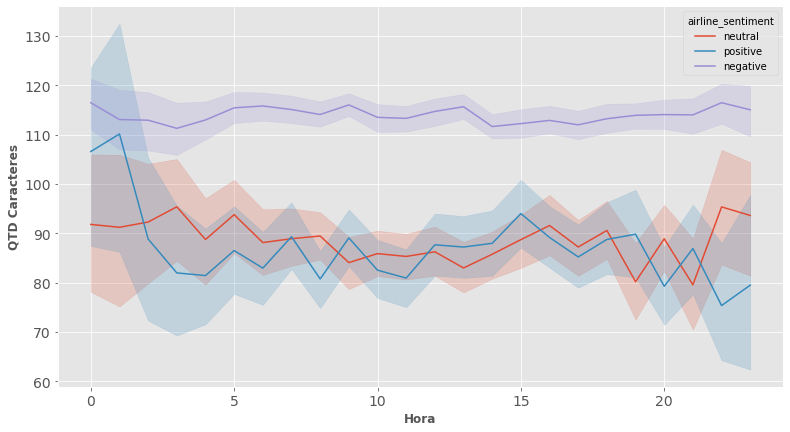

In [28]:
plt.figure(figsize=(13,7))
pp=sns.lineplot(data=dataset,x='Hora1',y='tamanho',hue='airline_sentiment',color='Blue')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
pp.set_ylabel('QTD Caracteres',fontproperties=font)
pp.set_xlabel('Hora',fontproperties=font)
plt.show()


In [29]:
dataset.drop(dataset[dataset.airline_sentiment == 'neutral'].index, inplace=True)

- Os comentários "neutros" não serão levados em consideração, tendo em vista que teoricamente não seriam aproveitados pela empresa, nesse momento. A máquina irá decidir se o neutro está mais para positivo ou negativo.

In [30]:
import string

In [31]:
from nltk.corpus import stopwords

- Com 'stopwords' podemos considerar palavras que podem ser consideradas irrelevantes para uma pesquisa, por exemplo. 
    - As
    - E
    - Os
    - De
    - ...
- Como estamos usando uma base de dados em inglês é importante pegarmos também as stopwords em inglês.

In [32]:
stop_words=stopwords.words('english')

In [33]:
def processamento(text:str) -> str:
    sempont=[car for car in text if car not in string.punctuation]
    sempont=''.join(sempont)
    text_process=[word for word in sempont.split() if word.lower() not in stopwords.words('english')]
    text_process=[word for word in sempont.split() if word.lower() not in Twitter]
    
    return text_process

- Na função acima será feita a tratativa do texto, vamos retirar todas as pontuações e caracteres especiais, logo depois, vamos retirar as stopwords e por últimos vamos tirar os nomes das empresas, uma vez que elas também não serão úteis para a análise.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

- A função CountVectorizer tem como função básica converter textos em matrizes numéricas que mostram quantas vezes cada palavra se repete.

- A limpeza que fizermos anteriormente foi muito importante, pois as próximas etapas demandam muito processamento.

In [35]:
transformador = CountVectorizer(analyzer=processamento).fit(dataset['text'])

print(len(transformador.vocabulary_))

16799


- Analyzer: É uma função que é passada para o CountVectorizer, assim os dados podem ser passados de forma bruta e eles serão tratados.

In [36]:
type(transformador)

sklearn.feature_extraction.text.CountVectorizer

In [37]:
msg_trans = transformador.transform(dataset['text'])

- Transform: Transforma o tipo de dado.

In [38]:
print('Dimensões Matriz Esparsa: ', msg_trans.shape)
print('Quantidade de ocorrências de zero: ', msg_trans.nnz)

Dimensões Matriz Esparsa:  (11541, 16799)
Quantidade de ocorrências de zero:  201134


- Uma matriz é dita esparsa quando possui uma grande quantidade de elementos com valor zero.
<table border = “2“>
<tr>
<th></th> <th>1ª Mensagem</th> <th>2ª Mensagem</th> <th>3ª Mensagem</th> <th>...</th> <th>Nª Message </th> 
</tr>
<tr>
<td><b>1ª Palavra</b></td><td>0</td><td>1</td><td>1</td><td>...</td>
    <td>1</td>
</tr>
<tr>
<td><b>2ª Palavra</b></td><td>0</td><td>1</td><td>1</td><td>...</td>
    <td>2</td>
</tr>
<tr>
<td><b>3ª Palavra</b></td><td>0</td><td>1</td><td>1</td><td>...</td>
    <td>1</td>
</tr>
<tr>
<td><b>Nª Palavra</b></td><td>0</td><td>1</td><td>1</td><td>...</td>
    <td>3</td>
</tr>
</table>

In [39]:
esparcidade = (100.0 * msg_trans.nnz / (msg_trans.shape[0] * msg_trans.shape[1]))
print('Esparcidade: {:0.2f}%'.format(esparcidade))

Esparcidade: 0.10%


- Como vemos acima, apesar da matriz ter 201134 zeros, isso é somente 0.10% da matriz.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(msg_trans)
messages_tfidf = tfidf_transformer.transform(msg_trans)
print(messages_tfidf.shape)


(11541, 16799)


- "O valor tf–idf (abreviação do inglês term frequency–inverse document frequency, que significa frequência do termo–inverso da frequência nos documentos), é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico. Ela é frequentemente utilizada como fator de ponderação na recuperação de informações e na mineração de dados."
[__[Term Frequency–inverse Document Frequency](https://pt.wikipedia.org/wiki/Tf%E2%80%93idf)__ ](#division_ID)
- N=Qtd. de documentos
- dft= Qtd de documentos onde o termo t aparece.
$$IDF_t=\log(\frac{N}{df_t})$$
$$TFIDF_t,_d = TF_t,_d × IDF_t$$

- Ao final, teremos essa representação:
<table border = “2“>
<tr>
<th></th> <th>1ª Mensagem</th> <th>2ª Mensagem</th> <th>3ª Mensagem</th> <th>...</th> <th>Nª Message </th> 
</tr>
<tr>
<td><b>1ª Palavra</b></td><td>0</td><td>0.08</td><td>0.18</td><td>...</td>
    <td>0.12</td>
</tr>
<tr>
<td><b>2ª Palavra</b></td><td>0</td><td>0.06</td><td>0.19</td><td>...</td>
    <td>0.13</td>
</tr>
<tr>
<td><b>3ª Palavra</b></td><td>0</td><td>0.06</td><td>0.19</td><td>...</td>
    <td>0.1</td>
</tr>
<tr>
<td><b>Nª Palavra</b></td><td>0</td><td>0.1</td><td>0.2</td><td>...</td>
    <td>0.2</td>
</tr>
</table>

In [41]:
from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB().fit(messages_tfidf, dataset['text'])

- Nesse caso, iremos usar a Distribuição multionimal de Naive Bayes

In [42]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(dataset['text'],dataset['airline_sentiment'],test_size=0.2)

In [43]:
print('O dataset de treino possui {} mensagens e o de teste {}.'.format(x_treino.shape[0], x_teste.shape[0]))

O dataset de treino possui 9232 mensagens e o de teste 2309.


In [44]:
from sklearn.pipeline import Pipeline

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=processamento)),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

In [46]:
pipeline.fit(x_treino,y_treino)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function processamento at 0x000001B80883D4C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [47]:
pred=pipeline.predict(x_teste)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_teste))

              precision    recall  f1-score   support

    negative       1.00      0.83      0.90      2252
    positive       0.13      1.00      0.22        57

    accuracy                           0.83      2309
   macro avg       0.56      0.91      0.56      2309
weighted avg       0.98      0.83      0.89      2309



<AxesSubplot:>

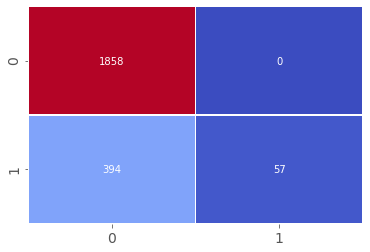

In [49]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_teste,pred), annot=True,cbar=False,fmt="d",linewidths=.5,cmap='coolwarm')


In [50]:
from sklearn.model_selection import cross_val_score
SEED = 50
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
sentiment_detect_NB = cross_val_score(pipeline, x_treino, y_treino, cv=cv, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
print("MultinomialNB")
intervalo(sentiment_detect_NB)
print("\n")

MultinomialNB
Acurácia média: 81.90%
Intervalo de acurácia: [81.54% ~ 82.26%]


